Importing necessary modules: Pandas for data manipulation, requests to make HTTP requests, NBA API to obtain NBA player data, time for timing functions, and matplotlib and seaborn for data visualization.

In [129]:
import pandas as pd
import requests
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
import time
import matplotlib.pyplot as plt
import seaborn as sns

Setting Pandas options to display all columns but not all rows.

In [130]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

Reading in a CSV file of NBA player data and creating a Pandas DataFrame object.

In [131]:
df = pd.read_csv('NBA_EDA.csv')

In [178]:
# Grouping the DataFrame by the 'SCHOOL' column and counting the frequency of each school. 
# Sorting the result in descending order of frequency.
schools_count = df.groupby('SCHOOL')['SCHOOL'].count().sort_values(ascending = False)
# .reset_index(name='count').sort_values(['count'], ascending=False)

# Creating a new DataFrame consisting of schools that appear in the original DataFrame at least 5 times.
big_schools = schools_count.loc[schools_count > 5]

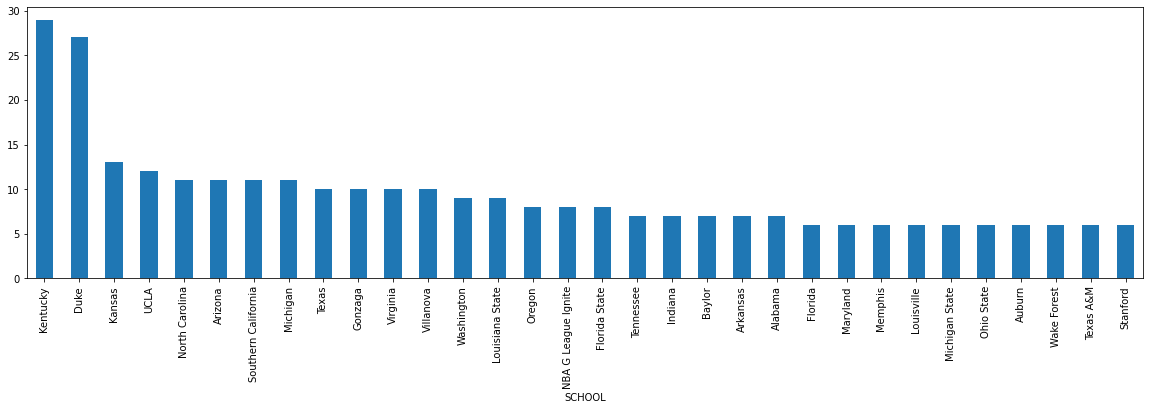

In [133]:
plt.figure(figsize=(20, 5))
big_schools.plot(kind="bar")
plt.show()

Kentucky and Duke have by far the most current players, followed by many other large Universities and Colleges, with the NBA G Leaugue also appearing

In [179]:
# Creating a new DataFrame of school names with their corresponding counts.
schools_df = pd.DataFrame(schools_count.index)
schools_df['count'] = schools_count.values
schools_df

,SCHOOL,count
0,Kentucky,29
1,Duke,27
2,Kansas,13
3,UCLA,12
4,North Carolina,11
...,...,...
175,Cholet,1
176,Colorado State,1
177,Ohio,1
178,Northwest Missouri State,1


In [137]:
# Grouping the DataFrame by the 'count' column and counting the frequency of each count.
count_schools = schools_df.groupby('count').size()

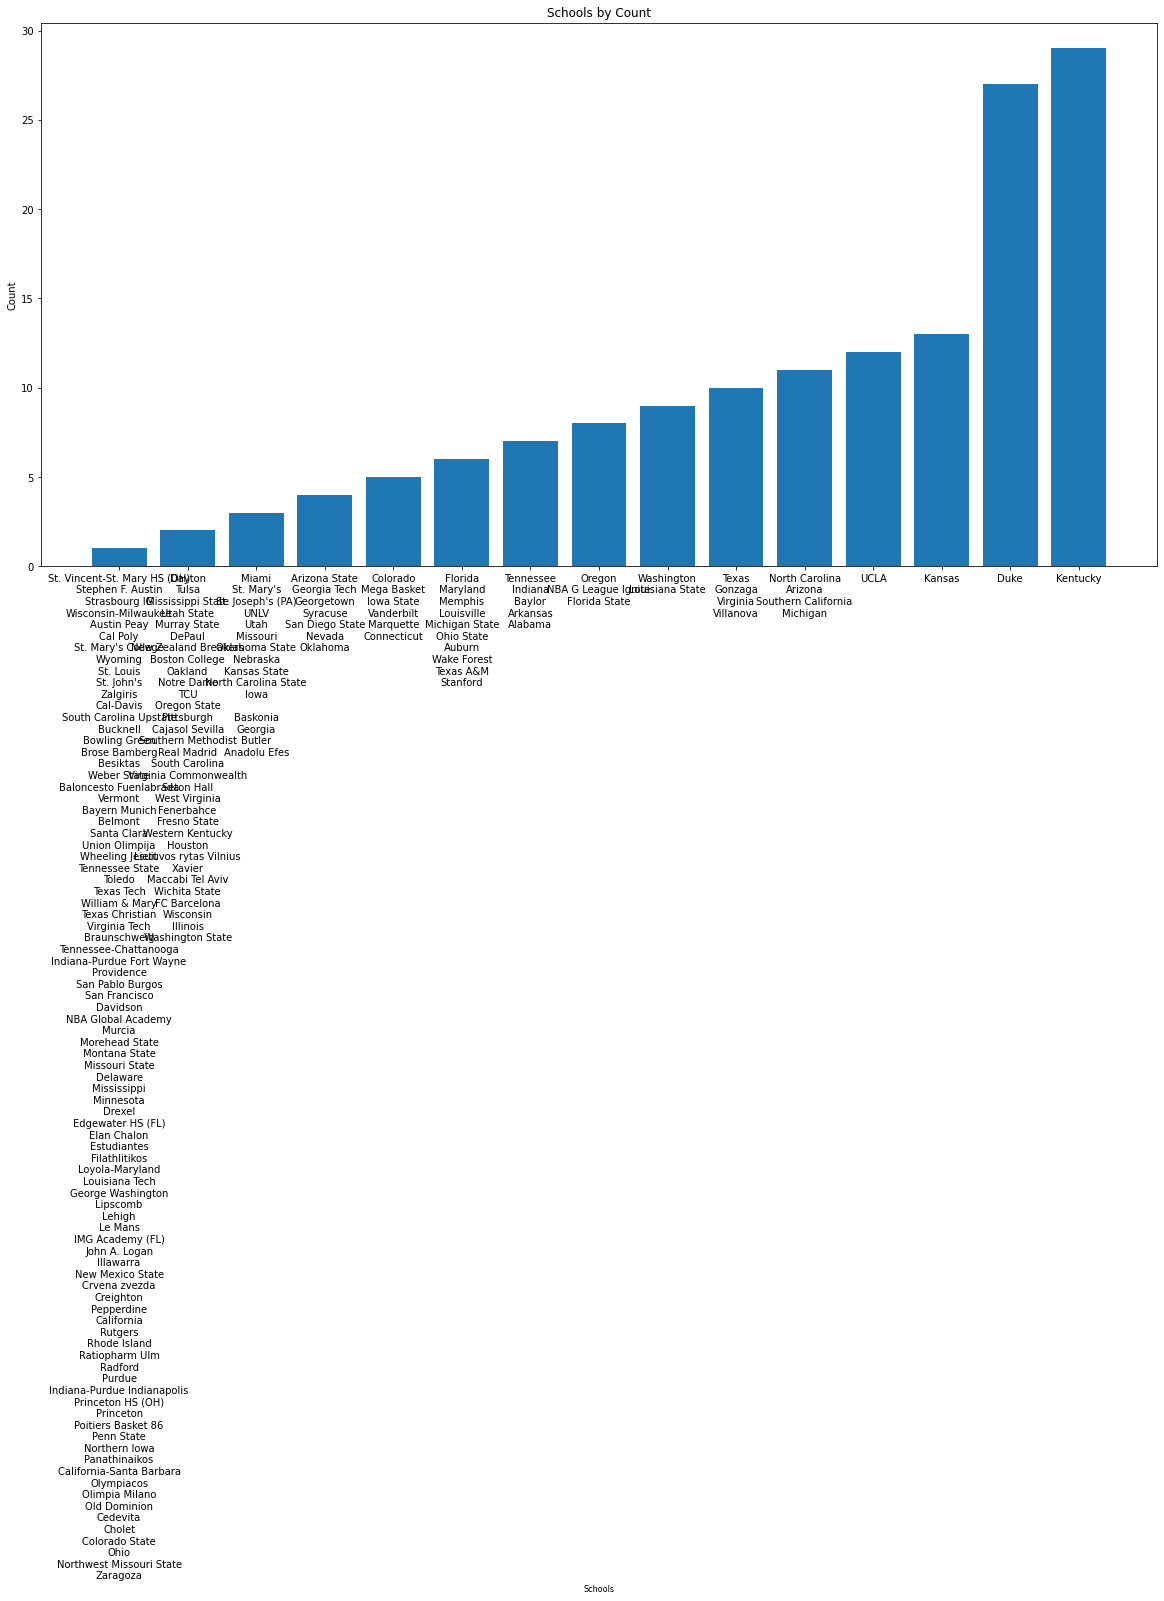

In [138]:
fig, ax = plt.subplots(figsize=(20, 10)) 

grouped = schools_df.groupby('count')['SCHOOL'].apply(lambda x: '\n'.join(x))

# create a bar chart using the grouped data
plt.bar(grouped.values, grouped.index, width=0.8)

# add labels and title
plt.xlabel('Schools', fontsize=8)
plt.ylabel('Count')
plt.title('Schools by Count')

# show the plot
plt.show()

In [139]:
# Creating a new DataFrame consisting of schools that appear in the original DataFrame less than or equal to 5 times.
small_schools = schools_count.loc[schools_count <= 5]
small_schools

SCHOOL
Colorado                    5
Mega Basket                 5
Iowa State                  5
Vanderbilt                  5
Marquette                   5
                           ..
Cholet                      1
Colorado State              1
Ohio                        1
Northwest Missouri State    1
Zaragoza                    1
Name: SCHOOL, Length: 148, dtype: int64

In [141]:
# Grouping the DataFrame by the 'COUNTRY' column and counting the frequency of each country.
country_count = df.groupby('COUNTRY')['COUNTRY'].count().sort_values(ascending = False)

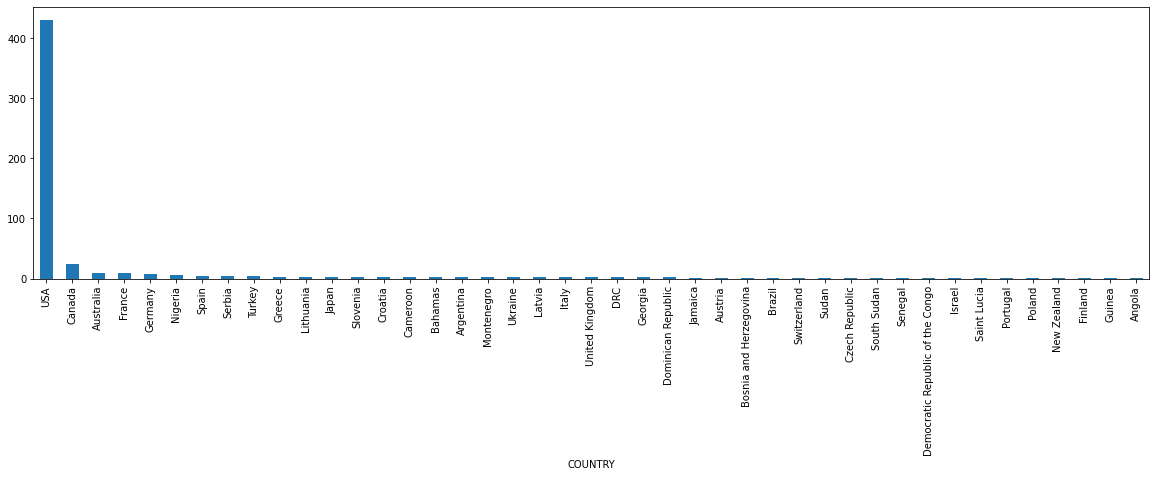

In [142]:
plt.figure(figsize=(20, 5))
country_count.plot(kind="bar")
plt.show()

The scale for number of players from USA affects viewing the other countries...

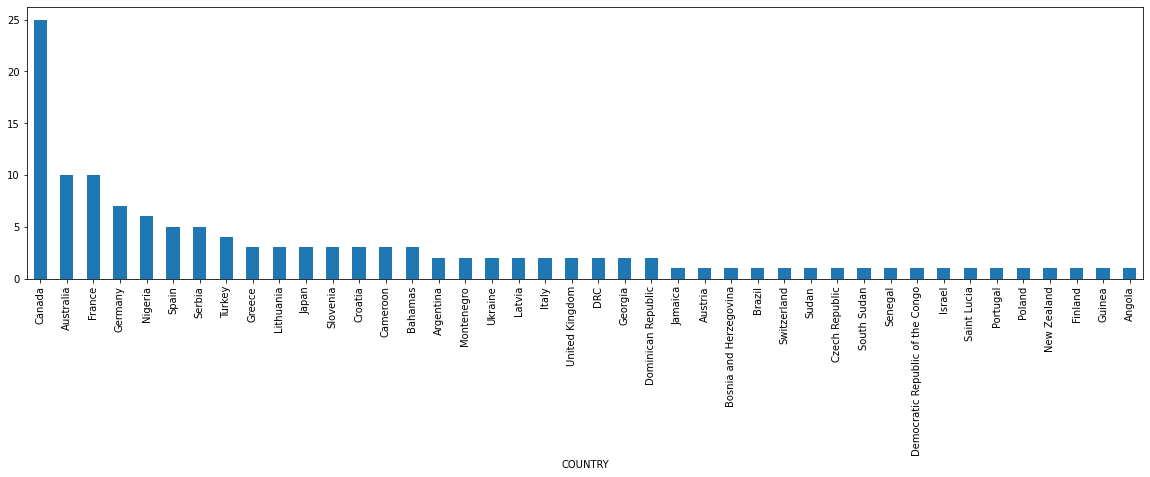

In [180]:
#Creating a new DataFrame consisting of countries that appear in the original DataFrame less than 30 times.

country_lss_thn_30 = country_count.loc[country_count < 30]

plt.figure(figsize=(20, 5))
country_lss_thn_30.plot(kind="bar")
plt.show()

I would not have expected Canada to have the 2nd most NBA players currently however: There are a few possible reasons why Canada has the second most current NBA players:

First, the NBA has made a concerted effort to expand its reach globally, and Canada has been a key focus of this effort. The league has invested in programs and initiatives to promote basketball in Canada, and has also expanded its presence in the country by adding a Canadian team, the Raptors, in 1995 and who won the NBA championship in 2019. This has led to an increase in the number of young Canadian players taking up basketball and pursuing careers in the sport.

Canada has a strong basketball infrastructure, with well-organized amateur leagues and development programs, as well as high-quality coaching and training facilities. This has helped to identify and nurture talented players, who are then able to compete at the highest level.

Finally, many Canadian players have also benefited from playing college basketball in the United States, where they are able to compete against top-level competition and attract the attention of NBA scouts and coaches.

In [144]:
world_pop = pd.read_csv('population_by_country_2020.csv')

In [145]:
world_pop['YearlyChangeFloat'] = world_pop['Yearly Change'].str.slice(0,4).astype(float)
world_pop['Population (2021)'] = world_pop['Population (2020)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop['Population (2022)'] = world_pop['Population (2021)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop['Population (2023)'] = world_pop['Population (2022)'] * (100 + world_pop['YearlyChangeFloat'])
world_pop

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,YearlyChangeFloat,Population (2021),Population (2022),Population (2023)
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %,0.39,1.445915e+11,1.451554e+13,1.457215e+15
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %,0.99,1.396030e+11,1.409851e+13,1.423809e+15
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %,0.59,3.332960e+10,3.352624e+12,3.372405e+14
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %,1.07,2.769536e+10,2.799170e+12,2.829122e+14
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %,2.00,2.260450e+10,2.305659e+12,2.351773e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %,0.06,4.995996e+05,4.998993e+07,5.001993e+09
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %,3.05,3.603658e+05,3.713570e+07,3.826834e+09
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %,0.68,1.639070e+05,1.650216e+07,1.661438e+09
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %,1.27,1.377272e+05,1.394763e+07,1.412477e+09


In [163]:
world_pop2 = pd.read_csv('WPP2022_TotalPopulationBySex.csv')

C:\Users\abrah\AppData\Local\Temp\ipykernel_9196\1013687552.py:1: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  world_pop2 = pd.read_csv('WPP2022_TotalPopulationBySex.csv')


In [164]:
world_pop2 = world_pop2[(world_pop2.LocTypeName == 'Country/Area') & (world_pop2.Time == 2022)]

In [165]:
# New column copying Location
world_pop2['Country'] = world_pop2['Location']

C:\Users\abrah\AppData\Local\Temp\ipykernel_9196\697224521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_pop2['Country'] = world_pop2['Location']


In [166]:
world_pop2['Country'] = world_pop2['Country'].str.replace('United States of America', 'USA')

C:\Users\abrah\AppData\Local\Temp\ipykernel_9196\2642646904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_pop2['Country'] = world_pop2['Country'].str.replace('United States of America', 'USA')


In [167]:
world_pop2[(world_pop2['LocTypeName'] == 'Country/Area') & (world_pop2.Variant == 'Medium') & (world_pop2.Time == 2022)]

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Country
221604,29.0,108,NaN,BDI,BI,108.0,4.0,Country/Area,910.0,Burundi,2,Medium,2022,2022.5,6400.926,6488.650,12889.576,496.708,Burundi
222861,30.0,174,NaN,COM,KM,174.0,4.0,Country/Area,910.0,Comoros,2,Medium,2022,2022.5,420.357,416.416,836.774,449.636,Comoros
224118,31.0,262,NaN,DJI,DJ,262.0,4.0,Country/Area,910.0,Djibouti,2,Medium,2022,2022.5,556.264,564.584,1120.849,48.354,Djibouti
225375,32.0,232,NaN,ERI,ER,232.0,4.0,Country/Area,910.0,Eritrea,2,Medium,2022,2022.5,1817.878,1866.154,3684.032,30.410,Eritrea
226632,33.0,231,NaN,ETH,ET,231.0,4.0,Country/Area,910.0,Ethiopia,2,Medium,2022,2022.5,61980.175,61399.749,123379.924,123.380,Ethiopia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544653,286.0,882,NaN,WSM,WS,882.0,4.0,Country/Area,957.0,Samoa,2,Medium,2022,2022.5,113.375,109.007,222.382,78.580,Samoa
545910,287.0,772,35.0,TKL,TK,772.0,4.0,Country/Area,957.0,Tokelau,2,Medium,2022,2022.5,0.935,0.937,1.871,155.917,Tokelau
547167,288.0,776,NaN,TON,TO,776.0,4.0,Country/Area,957.0,Tonga,2,Medium,2022,2022.5,52.848,54.010,106.858,164.396,Tonga
548424,289.0,798,NaN,TUV,TV,798.0,4.0,Country/Area,957.0,Tuvalu,2,Medium,2022,2022.5,5.799,5.513,11.312,377.050,Tuvalu


In [168]:
country_count

COUNTRY
USA                                 431
Canada                               25
Australia                            10
France                               10
Germany                               7
Nigeria                               6
Spain                                 5
Serbia                                5
Turkey                                4
Greece                                3
Lithuania                             3
Japan                                 3
Slovenia                              3
Croatia                               3
Cameroon                              3
Bahamas                               3
Argentina                             2
Montenegro                            2
Ukraine                               2
Latvia                                2
Italy                                 2
United Kingdom                        2
DRC                                   2
Georgia                               2
Dominican Republic              

In [152]:
# create a list of countries from the COUNTRY Series
countries = list(country_count.sort_index().index)

# create a Boolean mask based on whether Location2 is in the list of countries
mask = world_pop2['Location2'].isin(countries)

# filter the worldpop2 DataFrame based on the Boolean mask
worldpop2_filtered = world_pop2[mask]


In [153]:
worldpop2_filtered.Location2.unique()

array(['South Sudan', 'Angola', 'Cameroon',
       'Democratic Republic of the Congo', 'Sudan', 'Guinea', 'Nigeria',
       'Senegal', 'Japan', 'Georgia', 'Israel', 'Poland', 'Ukraine',
       'Finland', 'Latvia', 'Lithuania', 'United Kingdom',
       'Bosnia and Herzegovina', 'Croatia', 'Greece', 'Italy',
       'Montenegro', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Austria',
       'France', 'Germany', 'Switzerland', 'Bahamas',
       'Dominican Republic', 'Jamaica', 'Saint Lucia', 'Argentina',
       'Brazil', 'Canada', 'USA', 'Australia', 'New Zealand'],
      dtype=object)

 'Czech Republic',
 'DRC',
 'Turkey',

In [155]:
countries

['Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Brazil',
 'Cameroon',
 'Canada',
 'Croatia',
 'Czech Republic',
 'DRC',
 'Democratic Republic of the Congo',
 'Dominican Republic',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guinea',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Latvia',
 'Lithuania',
 'Montenegro',
 'New Zealand',
 'Nigeria',
 'Poland',
 'Portugal',
 'Saint Lucia',
 'Senegal',
 'Serbia',
 'Slovenia',
 'South Sudan',
 'Spain',
 'Sudan',
 'Switzerland',
 'Turkey',
 'USA',
 'Ukraine',
 'United Kingdom']

After sorting through the players' countries, there is a mistake in dataframe df with:   <br>
-the 1 player listed as Democratic Republic of the Congo being from Republic of the Congo and   <br>
-2 players listed as DRC actually being from Democratic Republic of the Congo

In [ ]:
# df.loc[df['PERSON_ID'] == 201586, 'COUNTRY'] = 'Republic of the Congo'
# df.loc[df['PERSON_ID'] == 202687, 'COUNTRY'] = 'Democratic Republic of the Congo'
# df.loc[df['PERSON_ID'] == 1630228, 'COUNTRY'] = 'Democratic Republic of the Congo'

There are 3 nations listed in df COUNTRY that are not in dataframe world_pop2: <br> Czech Republic, DRC, and Turkey

In [173]:
# using the ISO3_code for CZE, COD, COG (due to Republic of the Congo vs DRC issue earlier discovered), and TUR
world_pop2.loc[world_pop2['ISO3_code'].str.contains('CZE')].head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Country
376215,152.0,203,NaN,CZE,CZ,203.0,4.0,Country/Area,923.0,Czechia,2,Medium,2022,2022.5,5169.472,5324.514,10493.986,135.927,Czechia
376294,152.0,203,NaN,CZE,CZ,203.0,4.0,Country/Area,923.0,Czechia,3,High,2022,2022.5,5173.297,5328.149,10501.445,136.024,Czechia
376373,152.0,203,NaN,CZE,CZ,203.0,4.0,Country/Area,923.0,Czechia,4,Low,2022,2022.5,5165.648,5320.879,10486.527,135.831,Czechia
376452,152.0,203,NaN,CZE,CZ,203.0,4.0,Country/Area,923.0,Czechia,5,Constant fertility,2022,2022.5,5169.472,5324.514,10493.986,135.927,Czechia
376531,152.0,203,NaN,CZE,CZ,203.0,4.0,Country/Area,923.0,Czechia,6,Instant replacement,2022,2022.5,5175.112,5329.874,10504.987,136.070,Czechia


In [174]:
world_pop2.loc[world_pop2['ISO3_code'].str.contains('COD')].head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Country
253029,54.0,178,NaN,COG,CG,178.0,4.0,Country/Area,911.0,Congo,2,Medium,2022,2022.5,2981.800,2988.624,5970.424,17.483,Congo
253108,54.0,178,NaN,COG,CG,178.0,4.0,Country/Area,911.0,Congo,3,High,2022,2022.5,2984.491,2991.265,5975.757,17.499,Congo
253187,54.0,178,NaN,COG,CG,178.0,4.0,Country/Area,911.0,Congo,4,Low,2022,2022.5,2979.108,2985.983,5965.091,17.467,Congo
253266,54.0,178,NaN,COG,CG,178.0,4.0,Country/Area,911.0,Congo,5,Constant fertility,2022,2022.5,2981.800,2988.624,5970.424,17.483,Congo
253345,54.0,178,NaN,COG,CG,178.0,4.0,Country/Area,911.0,Congo,6,Instant replacement,2022,2022.5,2961.612,2968.816,5930.427,17.366,Congo


In [175]:
world_pop2.loc[world_pop2['ISO3_code'].str.contains('COG')].head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Country
254286,55.0,180,NaN,COD,CD,180.0,4.0,Country/Area,911.0,Democratic Republic of the Congo,2,Medium,2022,2022.5,49118.035,49892.177,99010.212,43.674,Democratic Republic of the Congo
254365,55.0,180,NaN,COD,CD,180.0,4.0,Country/Area,911.0,Democratic Republic of the Congo,3,High,2022,2022.5,49158.948,49932.482,99091.429,43.709,Democratic Republic of the Congo
254444,55.0,180,NaN,COD,CD,180.0,4.0,Country/Area,911.0,Democratic Republic of the Congo,4,Low,2022,2022.5,49077.122,49851.872,98928.995,43.638,Democratic Republic of the Congo
254523,55.0,180,NaN,COD,CD,180.0,4.0,Country/Area,911.0,Democratic Republic of the Congo,5,Constant fertility,2022,2022.5,49118.035,49892.177,99010.212,43.674,Democratic Republic of the Congo
254602,55.0,180,NaN,COD,CD,180.0,4.0,Country/Area,911.0,Democratic Republic of the Congo,6,Instant replacement,2022,2022.5,48501.078,49284.397,97785.474,43.133,Democratic Republic of the Congo


In [176]:
world_pop2.loc[world_pop2['ISO3_code'].str.contains('TUR')].head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,Country
367416,145.0,792,NaN,TUR,TR,792.0,4.0,Country/Area,922.0,Türkiye,2,Medium,2022,2022.5,42762.429,42578.812,85341.241,110.890,Türkiye
367495,145.0,792,NaN,TUR,TR,792.0,4.0,Country/Area,922.0,Türkiye,3,High,2022,2022.5,42804.232,42618.628,85422.860,110.996,Türkiye
367574,145.0,792,NaN,TUR,TR,792.0,4.0,Country/Area,922.0,Türkiye,4,Low,2022,2022.5,42720.628,42538.995,85259.622,110.784,Türkiye
367653,145.0,792,NaN,TUR,TR,792.0,4.0,Country/Area,922.0,Türkiye,5,Constant fertility,2022,2022.5,42762.429,42578.812,85341.241,110.890,Türkiye
367732,145.0,792,NaN,TUR,TR,792.0,4.0,Country/Area,922.0,Türkiye,6,Instant replacement,2022,2022.5,42794.885,42609.726,85404.610,110.972,Türkiye


df's Czech Republic, DRC, Republic of the Congo, and Turkey are world_pop2's: <br>
Czechia, Democratic Republic of the Congo, Congo, and Türkiye

In [157]:
df['COUNTRY'] = df['COUNTRY'].replace('Czech Republic', 'Czechia')

In [158]:
df.COUNTRY.unique()

array(['Nigeria', 'New Zealand', 'USA', 'Spain', 'Canada', 'Greece',
       'United Kingdom', 'Israel', 'Bahamas', 'France', 'Latvia',
       'Georgia', 'DRC', 'Serbia', 'Croatia', 'Sudan', 'Argentina',
       'Saint Lucia', 'Slovenia', 'Switzerland', 'Australia', 'Guinea',
       'Senegal', 'Dominican Republic', 'Cameroon', 'Angola', 'Italy',
       'South Sudan', 'Japan', 'Germany',
       'Democratic Republic of the Congo', 'Turkey', 'Czechia', 'Ukraine',
       'Finland', 'Brazil', 'Bosnia and Herzegovina', 'Austria',
       'Portugal', 'Jamaica', 'Lithuania', 'Montenegro', 'Poland'],
      dtype=object)